**Phishing Email Detection - Email Dataset Preparation**

This dataset was obtained from Kaggle. It is titled "Phishing Email Detection" by Cyber Cop. It can be found [here](https://www.kaggle.com/datasets/subhajournal/phishingemails/data).

It contains 18,600 emails.

In [ ]:
!pip install pandas scikit-learn imbalanced-learn

In [ ]:
#import numpy and pandas for mathematical computation and data manipulation respectively
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#import drive package to connect this colab file with the drive where the data will be retrived from
from google.colab import drive
#import drive package to connect this colab file with the drive where the data will be retrived from
from google.colab import drive

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

**Import the dataset from Google Drive**

In [ ]:
#mount google drive to access the dataset directly from the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CNS Project II/Phishing Email Detection/P_Emails.csv', encoding = "ISO-8859-1")

**Exploratory Data Analysis (EDA)**

In [ ]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


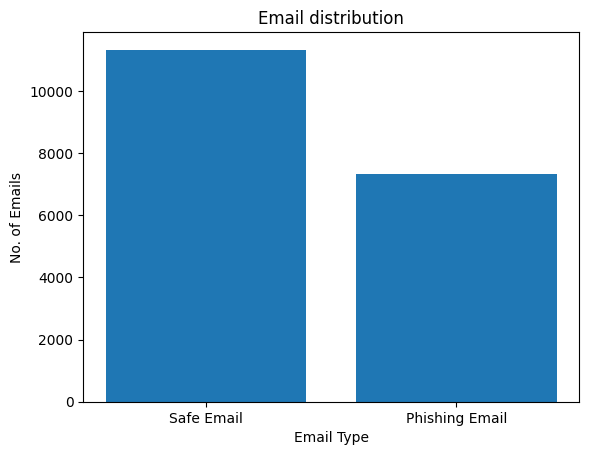

In [ ]:
# plot number of URLs in each label
label_counts = df['Email Type'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Email Type')
plt.ylabel('No. of Emails')
plt.title('Email distribution')
plt.show()

In [ ]:
# print the number of safe vs phishing Emails
label_counts = df['Email Type'].value_counts()
print(f'Number of Phishing Emails: {label_counts["Phishing Email"]}')
print(f'Number of Safe Emails: {label_counts["Safe Email"]}')

Number of Phishing Emails: 7328
Number of Safe Emails: 11322


In [ ]:
# Drop any row with null values
df = df.dropna(how='any',axis=0)

In [ ]:
# print the number of safe vs phishing Emails
label_counts = df['Email Type'].value_counts()
print(f'Number of Phishing Emails: {label_counts["Phishing Email"]}')
print(f'Number of Safe Emails: {label_counts["Safe Email"]}')

Number of Phishing Emails: 7312
Number of Safe Emails: 11322


In [ ]:
# Dropping Column as its not needed
df = df.drop('Unnamed: 0', axis=1)

# Change the remaining column headers
df.columns = ["emails", "labels"]
df.head(10)

,emails,labels
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,global risk management operations sally congra...,Safe Email
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,re : coastal deal - with exxon participation u...,Safe Email


In [ ]:
# Mapping the Labels column
df = df.replace(['Safe Email', 'Phishing Email'],[0,1])
df.head(10)

<ipython-input-12-91b1513c9067>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Safe Email', 'Phishing Email'],[0,1])


,emails,labels
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1
5,global risk management operations sally congra...,0
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",0
7,"entourage , stockmogul newsletter ralph velez ...",1
8,"we owe you lots of money dear applicant , afte...",1
9,re : coastal deal - with exxon participation u...,0


In [ ]:
# Print original class distribution
print("Original dataset shape:", df.shape)
print("Original class distribution:", Counter(df['labels']))

Original dataset shape: (18634, 2)
Original class distribution: Counter({0: 11322, 1: 7312})


**Oversampling the Dataset**

In [ ]:
# Vectorize text
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['emails'])
y = df['labels'].values

In [ ]:
# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

Original distribution: Counter({0: 11322, 1: 7312})
Resampled distribution: Counter({0: 11322, 1: 11322})


In [ ]:
# Create oversampled dataset
indices = oversampler.sample_indices_
resampled_texts = df['emails'].iloc[indices].values

In [ ]:
# Save oversampled dataset
resampled_df = pd.DataFrame({
    'emails': resampled_texts,
    'labels': y_resampled
})

In [ ]:
resampled_df.head()

,emails,labels
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


**Save Oversampled Dataset to Google Drive**

In [ ]:
resampled_df.to_csv('/content/drive/MyDrive/CNS Project II/Phishing Email Detection/PED_EmailDataset.csv', index=False)
print("Saved oversampled dataset")

Saved oversampled dataset
